## 机器学习

线性回归
逻辑回归
SVM
RF


项目的目的是预测房价，需要从众多可能的影响因子中挑选出最能预测房价的因子来建立模型，用于预测房价。

分析步骤：
1.  理解项目目的，再围绕目的进行分析。本项目的目的根据数据预测房价；

2. 了解数据的分布特征，根据实际项目理解每列数据的意义。在数据分析时，最重要的是要熟悉业务，在业务基础上再分析，事半功倍；

3. 挑选特征。刻画每个特征与目标变量之间的关系，找出最重要的特征；同时，为了避免多重共线性，需剔除掉一个特征与特征之间相关性非常大的特征；

4. 应用交叉验证，对训练集进行建立合适的模型，再在测试集上测试；

5. 最终建立预测房价的模型。

## 房价预测

In [1]:
from sklearn import datasets
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
'''----------load 数据集-----------'''
dataset = datasets.load_boston()
dataset

{'DESCR': "Boston House Prices dataset\n===========================\n\nNotes\n------\nData Set Characteristics:  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive\n    \n    :Median Value (attribute 14) is usually the target\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per

In [3]:
# x 训练特征：['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
#'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
x = dataset.data
print(x)
target = dataset.target
print(target)
print('{},{}'.format(np.shape(x),np.shape(target)))

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]
[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.

In [4]:

#把label变为(?, 1)维度，为了使用下面的数据集合分割
y = np.reshape(target,(len(target), 1))
 
#讲数据集1:3比例分割为 测试集：训练集
#随机数的种子，若为1，则在重复实验时，可以得到相同的分割结果，0 其他，怎么数据不一样
x_train, x_verify, y_train, y_verify = train_test_split(x, y, random_state=1)
print('{},{},{},{}'.format(np.shape(x_train),np.shape( x_verify), np.shape(y_train), np.shape(y_verify)))

(379, 13),(127, 13),(379, 1),(127, 1)


In [5]:
'''----------定义线性回归模型，进行训练、预测-----------'''
lr = linear_model.LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_verify)

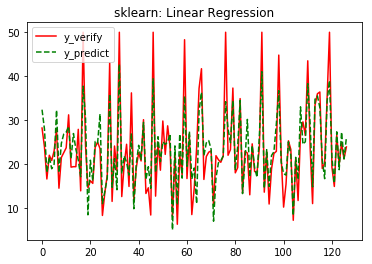

In [7]:
'''----------图形化预测结果-----------'''
#只显示前50个预测结果，太多的话看起来不直观
#plt.xlim([0,50])
plt.plot( range(len(y_verify)), y_verify, 'r', label='y_verify')
plt.plot( range(len(y_pred)), y_pred, 'g--', label='y_predict' )
plt.title('sklearn: Linear Regression')
plt.legend()
plt.savefig('lr-13.png')
plt.show()

In [8]:
'''----------输出模型参数、评价模型-----------'''
print(lr.coef_)
print(lr.intercept_)
print("MSE:",metrics.mean_squared_error(y_verify,y_pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_verify,y_pred)))
 
#输出模型对应R-Square
print(lr.score(x_train,y_train))
print(lr.score(x_verify,y_verify))

[[-1.13256952e-01  5.70869807e-02  3.87621062e-02  2.43279795e+00
  -2.12706290e+01  2.86930027e+00  7.02105327e-03 -1.47118312e+00
   3.05187368e-01 -1.06649888e-02 -9.97404179e-01  6.39833822e-03
  -5.58425480e-01]]
[45.23641585]
MSE: 21.88936943247509
RMSE: 4.6786076382269
0.7167286808673383
0.7790257749137307
